# Problem set 2: Machine Learning 2024.
## Alumnos: Ara Francisco, Corradi Valentin, Di Placido Pedro.

In [1105]:
import numpy as np
import pandas as pd

## General Instructions

El principal objetivo es construir un modelo que prediga la pobreza de los hogares. Un hogar es clasificado según la siguiente función indicadora:

$$
poor = I(Inc < Pl)
$$

Donde I indica si los ingresos de la familia están por debajo de cierto umbral.

Entonces, podemos seguir 2 caminos para hacer esta clasificación:

1 - Tomarlo como un problema de clasificación, donde se prediga 0 si no es pobre y 1 si lo es

2 - Predecir el ingreso, y luego fijarse si esta por debajo o por encima del umbral de pobreza.




## Introduction 



In [1106]:
import zipfile

zip_path = "mlunlp-2024-ps-2.zip"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    # Listar todos los archivos dentro del ZIP
    print(zip_ref.namelist())

['mlunlp-2024-ps-2/', '__MACOSX/._mlunlp-2024-ps-2', 'mlunlp-2024-ps-2/train_hogares.csv', '__MACOSX/mlunlp-2024-ps-2/._train_hogares.csv', 'mlunlp-2024-ps-2/ddi-documentation-spanish-608.pdf', '__MACOSX/mlunlp-2024-ps-2/._ddi-documentation-spanish-608.pdf', 'mlunlp-2024-ps-2/test_personas.csv', '__MACOSX/mlunlp-2024-ps-2/._test_personas.csv', 'mlunlp-2024-ps-2/train_personas.csv', '__MACOSX/mlunlp-2024-ps-2/._train_personas.csv', 'mlunlp-2024-ps-2/test_hogares.csv', '__MACOSX/mlunlp-2024-ps-2/._test_hogares.csv', 'mlunlp-2024-ps-2/sample_submission.csv', '__MACOSX/mlunlp-2024-ps-2/._sample_submission.csv']


In [1107]:
# import zipfile
import pandas as pd

# Ruta al archivo ZIP
zip_path = "mlunlp-2024-ps-2.zip"

# Leer archivos directamente desde el ZIP
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    # Cargar los datos usando las rutas correctas
    with zip_ref.open('mlunlp-2024-ps-2/train_hogares.csv') as train_hogares_file:
        train_hogares = pd.read_csv(train_hogares_file)
    with zip_ref.open('mlunlp-2024-ps-2/train_personas.csv') as train_personas_file:
        train_personas = pd.read_csv(train_personas_file)
    with zip_ref.open('mlunlp-2024-ps-2/test_hogares.csv') as test_hogares_file:
        test_hogares = pd.read_csv(test_hogares_file)
    with zip_ref.open('mlunlp-2024-ps-2/test_personas.csv') as test_personas_file:
        test_personas = pd.read_csv(test_personas_file)
    with zip_ref.open('mlunlp-2024-ps-2/sample_submission.csv') as sample_submission_file:
        sample_submission = pd.read_csv(sample_submission_file)

# Inspeccionar los datos
print("Datos de train_hogares:")
print(train_hogares.head())
print("Datos de train_personas:")
print(train_personas.head())


Datos de train_hogares:
                         id  Clase   Dominio  P5000  P5010  P5090  P5100  \
0  8d0193e328305a042001a35f      1  MEDELLIN      4      2      1    NaN   
1  cf7491d7f2cc9c216bd009e7      1  MEDELLIN      5      4      3    NaN   
2  d90a57f64d2a84dbacbed2a5      1  MEDELLIN      4      2      1    NaN   
3  db34e387a94a783188ab3a33      1  MEDELLIN      3      1      1    NaN   
4  97bbef785824746ecab09c6f      1  MEDELLIN      4      3      3    NaN   

      P5130     P5140  Nper  ...       Ingpcug             Li            Lp  \
0  400000.0       NaN     5  ...  5.816661e+05  122809.534158  289878.24715   
1       NaN  250000.0     4  ...  1.612500e+05  122809.534158  289878.24715   
2  700000.0       NaN     3  ...  2.000000e+06  122809.534158  289878.24715   
3  450000.0       NaN     1  ...  2.450000e+06  122809.534158  289878.24715   
4       NaN  500000.0     5  ...  2.520000e+05  122809.534158  289878.24715   

   Pobre  Indigente  Npobres  Nindigentes   

In [1108]:
# Matcheamos lo individual con el hogar. previamente le agregamos los sufijos _p o _h para saber su base original.

# # Personas
# train_personas = train_personas.rename(columns=lambda col: f"{col}_p" if col != "id" else col)
# train_hogares = train_hogares.rename(columns=lambda col: f"{col}_h" if col != "id" else col)
# train_all = train_personas.merge(train_hogares, on="id", how="inner")  

# #Hogares
# test_personas = test_personas.rename(columns=lambda col: f"{col}_p" if col != "id" else col)
# test_hogares = test_hogares.rename(columns=lambda col: f"{col}_h" if col != "id" else col)
# test_all = test_personas.merge(test_hogares, on="id", how="inner")

# print(f'Dimensión train_all: {train_all.shape}, Dimensión test_all: {test_all.shape}')

In [1109]:
print(train_hogares.shape)
print(train_personas.shape)
print(test_hogares.shape)
print(test_personas.shape)

(164960, 23)
(543109, 135)
(66168, 16)
(219644, 63)


Vemos que la dimensión de los df difiere. La muestra de testeo no tiene las variables relacionadas al ingreso o el indicador de pobreza/indigencia. Esto no debiera afectarnos ya que es la variable que buscamos predecir. Recordemos que un metodo a utilizar es categórico, donde en base a los predictores se clasifica directamente en pobre o no pobre, y el otro es "indirecto", donde primero se predice el ingreso y en base a eso se hace luego la clasificación.

In [1110]:
#print(train_hogares.columns)
#print(test_hogares.columns)

print(f'Las variables que difieren en los hogares son: \n{set(train_hogares.columns) - set(test_hogares.columns)}')

#print(train_personas.columns)
#print(test_personas.columns)

print(f'Las variables que difieren en las personas son: \n {set(train_personas.columns) - set(test_personas.columns)}')

Las variables que difieren en los hogares son: 
{'Ingtotugarr', 'Npobres', 'Ingpcug', 'Ingtotug', 'Nindigentes', 'Pobre', 'Indigente'}
Las variables que difieren en las personas son: 
 {'P6545s2', 'P6585s3a2', 'Iof3hes', 'Iof1es', 'P6585s2a2', 'Estrato1', 'Cclasnr2', 'P6510s2', 'P6630s6a1', 'P6580s2', 'Iof3ies', 'P7070', 'Ingtotob', 'P7510s5a1', 'P7500s3a1', 'Cclasnr8', 'P6760', 'Isa', 'Impa', 'Iof3i', 'P7510s1a1', 'Iof2', 'Imdies', 'P7472s1', 'Imdi', 'P6630s2a1', 'Iof6', 'Iof6es', 'P6585s1a2', 'Ie', 'P7500s2a1', 'P6600s1', 'Cclasnr5', 'Iof2es', 'P7500s1a1', 'P6500', 'Ingtot', 'P6750', 'P6610s1', 'P7140s2', 'P7422s1', 'P6620s1', 'Cclasnr11', 'P6590s1', 'P6585s4a2', 'P6630s4a1', 'P6585s4a1', 'Iees', 'P6580s1', 'P6585s2a1', 'Iof1', 'P6585s1a1', 'P7510s3a1', 'P550', 'P6545s1', 'P6630s3a1', 'Isaes', 'P6585s3a1', 'Iof3h', 'Ingtotes', 'P6510s1', 'Cclasnr7', 'P7500s1', 'P7510s7a1', 'P6630s1a1', 'P7510s6a1', 'Impaes', 'Cclasnr4', 'Cclasnr3', 'P7510s2a1', 'Cclasnr6', 'P7140s1'}


In [1111]:
# print(train_hogares.columns)
print(F'test per: {train_hogares.columns}')

test per: Index(['id', 'Clase', 'Dominio', 'P5000', 'P5010', 'P5090', 'P5100', 'P5130',
       'P5140', 'Nper', 'Npersug', 'Ingtotug', 'Ingtotugarr', 'Ingpcug', 'Li',
       'Lp', 'Pobre', 'Indigente', 'Npobres', 'Nindigentes', 'Fex_c', 'Depto',
       'Fex_dpto'],
      dtype='object')


In [1112]:
import seaborn as sns
import matplotlib.pyplot as plt

In [1113]:
print("Variables en train_hogares:")
print(train_hogares.columns)


Variables en train_hogares:
Index(['id', 'Clase', 'Dominio', 'P5000', 'P5010', 'P5090', 'P5100', 'P5130',
       'P5140', 'Nper', 'Npersug', 'Ingtotug', 'Ingtotugarr', 'Ingpcug', 'Li',
       'Lp', 'Pobre', 'Indigente', 'Npobres', 'Nindigentes', 'Fex_c', 'Depto',
       'Fex_dpto'],
      dtype='object')


## Variables Seleccionadas: Hogares

- **`id`**: Identificador único del hogar.
- **`Pobre`**: Indicador de pobreza del hogar.
- **`Ingpcug`**: Ingreso per cápita del hogar.
- **`P5010`**: Número de cuartos donde duermen las personas.
- **`P5090`**: Régimen de tenencia de la vivienda (propia, alquilada, etc.).
- **`P5130`**: Monto estimado de arriendo.
- **`Nper`**: Número de personas en el hogar.
- **`Clase`**: Clasificación del hogar (cabecera o resto del área).
- **`Fex_c`**: Factor de expansión anualizado.


In [1114]:
columnas_hogares = ['id', 'P5000', 'P5010', 'P5090', 'P5130', 'Nper', 'Ingpcug', 'Clase', 'Fex_c', 'Pobre']
train_hogares = train_hogares[columnas_hogares]

## Variables Seleccionadas: Personas

- **`id`**: Identificador único del individuo.
- **`P6020`**: Sexo (1 hombre, 2 mujer).
- **`P6040`**: Edad de la persona.
- **`P6050`**: Parentezco con el jefe de hogar.
- **`P6090`**: Afilación a la seguridad social.
- **`P6210`**: Nivel educativo alcanzado.
- **`P6430`**: Tipo de empleo
- **`P6585s1`**: subsidio por alimentacion. 
- **`P6585s3a1`**: Subsidio familiar.(sacado)
- **`P7040`**: Dummy de ocupación secundaria (1 tiene ,2 no tiene)
- **`P7045`**: Horas trabajadas en ocupacion secundaria.
- **`P6800`**: Horas trabajadas por semana. (sacado)
- **`P6870`**: Numero de empleados de la empresa. (sacado)
- **`Ingtot`**: Ingreso total del individuo.
- **`Oc`**: Dummy de ocupación.

In [1115]:
# Selección de columnas relevantes incluyendo 'Pobre' para el merge
columnas_personas = ['id','Orden', 'P6020', 'P6040','P6050','P6090', 'P6210','P6430','P6585s1','P6585s3a1', 'P7040','P7045','Oc']
train_personas = train_personas[columnas_personas]

In [1116]:
# Crear una columna dummy que indique si el hogar recibió subsidio
train_personas['recibio_subsidio'] = ((train_personas['P6585s1'] > 0) | (train_personas['P6585s3a1'] > 0)).astype(int)

# Mostrar las primeras filas para verificar
print(train_personas[['id', 'P6585s1', 'P6585s3a1', 'recibio_subsidio']].head())

                         id  P6585s1  P6585s3a1  recibio_subsidio
0  8d0193e328305a042001a35f      2.0    75000.0                 1
1  8d0193e328305a042001a35f      NaN        NaN                 0
2  8d0193e328305a042001a35f      2.0    81000.0                 1
3  8d0193e328305a042001a35f      NaN        NaN                 0
4  8d0193e328305a042001a35f      NaN        NaN                 0


In [1117]:
# Ordenar la base de hogares por 'id'
train_hogares = train_hogares.sort_values(by='id')

# Ordenar la base de personas por 'id' y 'orden'
train_personas = train_personas.sort_values(by=['id', 'Orden'])

In [1118]:
# Calculate the proportion of men in each household
train_personas['prop_sexo'] = train_personas.groupby('id')['P6020'].transform(lambda x: (x == 1).sum() / len(x))

# Display the first few rows to verify the calculation
print(train_personas[['id', 'P6020', 'prop_sexo']].head()) #No genera ningún NaN

                              id  P6020  prop_sexo
115620  00004a3f76ed8c33d84a5c70      2        0.4
115621  00004a3f76ed8c33d84a5c70      1        0.4
115622  00004a3f76ed8c33d84a5c70      2        0.4
115618  00004a3f76ed8c33d84a5c70      2        0.4
115619  00004a3f76ed8c33d84a5c70      1        0.4


VER QUE HACEMOS SI GENERA ALGUNOS NAN

In [1119]:
# Filtrar la fila correspondiente al jefe del hogar (P6050 == 1)
jefe_hogar = train_personas[train_personas['P6050'] == 1]

# Crear un diccionario con la relación 'id' del hogar y la posición ocupacional del jefe (P6430)
jefe_ocupacion = jefe_hogar.set_index('id')['P6430'].to_dict()

# Asignar la posición ocupacional del jefe a la nueva variable 'ocup_jefe' en la train_personas
train_personas['ocup_jefe'] = train_personas['id'].map(jefe_ocupacion)

# Mostrar las primeras filas para verificar
print(train_personas[['id', 'ocup_jefe']].head(5))

                              id  ocup_jefe
115620  00004a3f76ed8c33d84a5c70        NaN
115621  00004a3f76ed8c33d84a5c70        NaN
115622  00004a3f76ed8c33d84a5c70        NaN
115618  00004a3f76ed8c33d84a5c70        NaN
115619  00004a3f76ed8c33d84a5c70        NaN


In [1120]:
# Crear una columna que indique si la persona está ocupada (1 si está ocupada, 0 si no)
train_personas['ocupada'] = (train_personas['Oc'] == 1).astype(int)

# Calcular la proporción de personas ocupadas por hogar
train_personas['prop_ocup'] = train_personas.groupby('id')['ocupada'].transform('mean')

# Mostrar las primeras filas para verificar
print(train_personas[['id', 'ocupada', 'prop_ocup']].head(5))

                              id  ocupada  prop_ocup
115620  00004a3f76ed8c33d84a5c70        0        0.2
115621  00004a3f76ed8c33d84a5c70        1        0.2
115622  00004a3f76ed8c33d84a5c70        0        0.2
115618  00004a3f76ed8c33d84a5c70        0        0.2
115619  00004a3f76ed8c33d84a5c70        0        0.2


In [1121]:
# Crear una columna que indique si la persona es mayor a 10 años (1 si es mayor a 10 años, 0 si no)
train_personas['mayor_10'] = (train_personas['P6040'] > 10).astype(int)

# Calcular la proporción de personas mayores a 10 años por hogar
train_personas['prop_mayores10'] = train_personas.groupby('id')['mayor_10'].transform('mean')

# Mostrar las primeras filas para verificar
print(train_personas[['id', 'P6040', 'mayor_10', 'prop_mayores10']].head())

                              id  P6040  mayor_10  prop_mayores10
115620  00004a3f76ed8c33d84a5c70     31         1             0.6
115621  00004a3f76ed8c33d84a5c70     36         1             0.6
115622  00004a3f76ed8c33d84a5c70     15         1             0.6
115618  00004a3f76ed8c33d84a5c70      6         0             0.6
115619  00004a3f76ed8c33d84a5c70      3         0             0.6


revisar nan de la variable P6090

In [1122]:
# Filter out rows where P6090 is 9
train_personas = train_personas[train_personas['P6090'] != 9]

# Create a column that indicates if the person is affiliated with social security (1 if affiliated, 0 if not)
train_personas['afiliado'] = (train_personas['P6090'] == 1).astype(int)

# Calculate the proportion of affiliated individuals in each household
train_personas['prop_afiliado'] = train_personas.groupby('id')['afiliado'].transform('mean')

# Display the first few rows to verify the calculation
print(train_personas[['id', 'P6090', 'afiliado', 'prop_afiliado']].head())

                              id  P6090  afiliado  prop_afiliado
115620  00004a3f76ed8c33d84a5c70    1.0         1            0.6
115621  00004a3f76ed8c33d84a5c70    1.0         1            0.6
115622  00004a3f76ed8c33d84a5c70    1.0         1            0.6
115618  00004a3f76ed8c33d84a5c70    NaN         0            0.6
115619  00004a3f76ed8c33d84a5c70    NaN         0            0.6


In [1123]:
# Create a column that indicates if the person has a secondary occupation (1 if they have, 0 if not)
train_personas['ocupacion_secundaria'] = (train_personas['P7040'] == 1).astype(int)

# Calculate the proportion of people with a secondary occupation in each household
train_personas['prop_ocup2'] = train_personas.groupby('id')['ocupacion_secundaria'].transform('mean')

# Display the first few rows to verify the calculation
print(train_personas[['id', 'P7040', 'ocupacion_secundaria', 'prop_ocup2']].head())

                              id  P7040  ocupacion_secundaria  prop_ocup2
115620  00004a3f76ed8c33d84a5c70    NaN                     0         0.0
115621  00004a3f76ed8c33d84a5c70    2.0                     0         0.0
115622  00004a3f76ed8c33d84a5c70    NaN                     0         0.0
115618  00004a3f76ed8c33d84a5c70    NaN                     0         0.0
115619  00004a3f76ed8c33d84a5c70    NaN                     0         0.0


In [1124]:
# Agrupar por 'id' y quedarnos con la primera fila de cada grupo
variables = ['id', 'prop_sexo', 'ocup_jefe', 'ocupada', 'prop_ocup', 'mayor_10', 'prop_mayores10', 'recibio_subsidio', 'ocupacion_secundaria', 'prop_ocup2','prop_afiliado']
train_personas_agg = train_personas[variables].drop_duplicates(subset='id', keep='first').reset_index(drop=True)

# Mostrar las primeras filas para verificar
display(train_personas_agg.head())

,id,prop_sexo,ocup_jefe,ocupada,prop_ocup,mayor_10,prop_mayores10,recibio_subsidio,ocupacion_secundaria,prop_ocup2,prop_afiliado
0,00004a3f76ed8c33d84a5c70,0.400000,NaN,0,0.200000,1,0.600000,0,0,0.000000,0.600000
1,000088edf78cfaaf1791beba,0.333333,NaN,0,0.333333,1,0.666667,0,0,0.333333,0.666667
2,00009b13480f6770b6a4d1e9,0.666667,4.0,1,0.666667,1,1.000000,0,0,0.000000,1.000000
3,0000b1899fb63a7bf0b73ccf,0.500000,4.0,1,0.500000,1,1.000000,0,0,0.000000,1.000000
4,0000f3ec65ccacadfcc59f32,0.333333,NaN,0,0.666667,1,1.000000,0,0,0.000000,1.000000


In [1125]:
print(f"Number of rows in train_personas_agg: {train_personas_agg.shape[0]}")
print(f"Number of rows in train_hogares: {train_hogares.shape[0]}")

Number of rows in train_personas_agg: 164933
Number of rows in train_hogares: 164960


In [1126]:
# Hacer un merge de train_hogares con train_personas_agg usando la columna 'id' con un inner join
train_hogares2 = train_hogares.merge(train_personas_agg, on='id', how='inner')

# Mostrar las primeras filas para verificar
train_hogares2.head()

,id,P5000,P5010,P5090,P5130,Nper,Ingpcug,Clase,Fex_c,Pobre,prop_sexo,ocup_jefe,ocupada,prop_ocup,mayor_10,prop_mayores10,recibio_subsidio,ocupacion_secundaria,prop_ocup2,prop_afiliado
0,00004a3f76ed8c33d84a5c70,3,2,1,250000.0,5,265285.883333,1,535.091737,1,0.400000,NaN,0,0.200000,1,0.600000,0,0,0.000000,0.600000
1,000088edf78cfaaf1791beba,3,2,3,NaN,3,344166.666667,1,48.637019,0,0.333333,NaN,0,0.333333,1,0.666667,0,0,0.333333,0.666667
2,00009b13480f6770b6a4d1e9,4,3,1,700000.0,3,833333.333333,1,18.831041,0,0.666667,4.0,1,0.666667,1,1.000000,0,0,0.000000,1.000000
3,0000b1899fb63a7bf0b73ccf,5,2,1,70000.0,2,355000.000000,2,48.193596,0,0.500000,4.0,1,0.500000,1,1.000000,0,0,0.000000,1.000000
4,0000f3ec65ccacadfcc59f32,4,2,1,350000.0,3,720830.666667,1,11.184193,0,0.333333,NaN,0,0.666667,1,1.000000,0,0,0.000000,1.000000


#### Hasta aca llegamos. continuamos sabado.

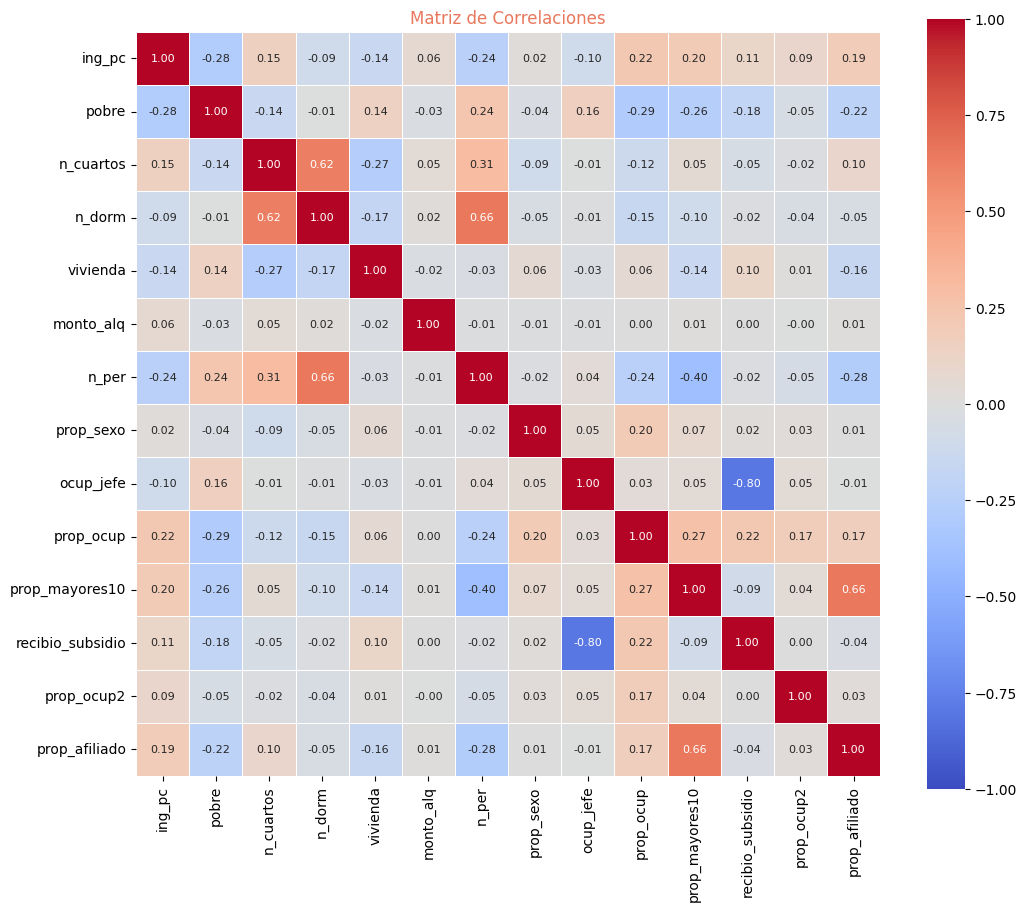

In [1127]:
# Renombrar las columnas
train_hogares2.rename(columns={
    'P5000': 'n_cuartos',
    'P5010': 'n_dorm',
    'P5090': 'vivienda',
    'P5130': 'monto_alq',
    'Nper': 'n_per',
    'Pobre': 'pobre',
    'Ingpcug': 'ing_pc',
    'Fex_c': 'fex_c'
}, inplace=True)

# Seleccionar las columnas de interés para la matriz de correlaciones
columnas_interes = ['ing_pc', 'pobre', 'n_cuartos','n_dorm','vivienda', 'monto_alq','n_per', 'prop_sexo', 'ocup_jefe', 'prop_ocup', 'prop_mayores10', 'recibio_subsidio', 'prop_ocup2', 'prop_afiliado']

# Calcular la matriz de correlaciones
corr_matrix = train_hogares2[columnas_interes].corr()

# Crear el mapa de calor con escala fija de -1 a 1
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_matrix, xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns, cmap='coolwarm', annot=True, fmt='.2f',
    cbar=True, square=True, annot_kws={'size': 8}, linewidth=.5,
    vmin=-1, vmax=1  # Configurar la escala fija de colores
)

# Personalizar el gráfico
plt.title('Matriz de Correlaciones', color='#E9785D')
plt.show()

#### union test

In [1128]:
columnas_hogares = ['id', 'P5000', 'P5010', 'P5090', 'P5130', 'Nper', 'Clase', 'Fex_c']
test_hogares = test_hogares[columnas_hogares]
# Selección de columnas relevantes incluyendo 'Pobre' para el merge
columnas_personas = ['id','Orden', 'P6020', 'P6040','P6050','P6090', 'P6210','P6430','P6585s1', 'P7040','P7045','Oc']
test_personas = test_personas[columnas_personas]
# Crear una columna dummy que indique si el hogar recibió subsidio
test_personas['recibio_subsidio'] = ((test_personas['P6585s1'] > 0)).astype(int)

In [1129]:


# Mostrar las primeras filas para verificar
print(test_personas[['id', 'P6585s1', 'recibio_subsidio']].head())
# Ordenar la base de hogares por 'id'
test_hogares = test_hogares.sort_values(by='id')

# Ordenar la base de personas por 'id' y 'orden'
test_personas = test_personas.sort_values(by=['id', 'Orden'])
# Calculate the proportion of men in each household
test_personas['prop_sexo'] = test_personas.groupby('id')['P6020'].transform(lambda x: (x == 1).sum() / len(x))

# Display the first few rows to verify the calculation
print(test_personas[['id', 'P6020', 'prop_sexo']].head()) #No genera ningún NaN
# Filtrar la fila correspondiente al jefe del hogar (P6050 == 1)
jefe_hogar = test_personas[test_personas['P6050'] == 1]

# Crear un diccionario con la relación 'id' del hogar y la posición ocupacional del jefe (P6430)
jefe_ocupacion = jefe_hogar.set_index('id')['P6430'].to_dict()

# Asignar la posición ocupacional del jefe a la nueva variable 'ocup_jefe' en la test_personas
test_personas['ocup_jefe'] = test_personas['id'].map(jefe_ocupacion)

# Mostrar las primeras filas para verificar
print(test_personas[['id', 'ocup_jefe']].head(5))
# Crear una columna que indique si la persona está ocupada (1 si está ocupada, 0 si no)
test_personas['ocupada'] = (test_personas['Oc'] == 1).astype(int)

# Calcular la proporción de personas ocupadas por hogar
test_personas['prop_ocup'] = test_personas.groupby('id')['ocupada'].transform('mean')

# Mostrar las primeras filas para verificar
print(test_personas[['id', 'ocupada', 'prop_ocup']].head(5))
# Crear una columna que indique si la persona es mayor a 10 años (1 si es mayor a 10 años, 0 si no)
test_personas['mayor_10'] = (test_personas['P6040'] > 10).astype(int)

# Calcular la proporción de personas mayores a 10 años por hogar
test_personas['prop_mayores10'] = test_personas.groupby('id')['mayor_10'].transform('mean')

# Mostrar las primeras filas para verificar
print(test_personas[['id', 'P6040', 'mayor_10', 'prop_mayores10']].head())
# Filter out rows where P6090 is 9
test_personas = test_personas[test_personas['P6090'] != 9]

# Create a column that indicates if the person is affiliated with social security (1 if affiliated, 0 if not)
test_personas['afiliado'] = (test_personas['P6090'] == 1).astype(int)

# Calculate the proportion of affiliated individuals in each household
test_personas['prop_afiliado'] = test_personas.groupby('id')['afiliado'].transform('mean')

# Display the first few rows to verify the calculation
print(test_personas[['id', 'P6090', 'afiliado', 'prop_afiliado']].head())
# Create a column that indicates if the person has a secondary occupation (1 if they have, 0 if not)
test_personas['ocupacion_secundaria'] = (test_personas['P7040'] == 1).astype(int)

# Calculate the proportion of people with a secondary occupation in each household
test_personas['prop_ocup2'] = test_personas.groupby('id')['ocupacion_secundaria'].transform('mean')

# Display the first few rows to verify the calculation
print(test_personas[['id', 'P7040', 'ocupacion_secundaria', 'prop_ocup2']].head())

                         id  P6585s1  recibio_subsidio
0  3279230a4917cdf883df34cd      2.0                 1
1  3279230a4917cdf883df34cd      NaN                 0
2  3279230a4917cdf883df34cd      2.0                 1
3  3279230a4917cdf883df34cd      NaN                 0
4  01bd1f72445acc719d19bd25      NaN                 0
                              id  P6020  prop_sexo
114499  00007322a7918c7799e7a514      2        0.0
101740  0004847804c0618d4633b196      1        0.5
101741  0004847804c0618d4633b196      2        0.5
40523   0004add76858a3b0cc39eb9b      1        0.8
40524   0004add76858a3b0cc39eb9b      2        0.8
                              id  ocup_jefe
114499  00007322a7918c7799e7a514        1.0
101740  0004847804c0618d4633b196        4.0
101741  0004847804c0618d4633b196        4.0
40523   0004add76858a3b0cc39eb9b        2.0
40524   0004add76858a3b0cc39eb9b        2.0
                              id  ocupada  prop_ocup
114499  00007322a7918c7799e7a514        1      

In [1130]:
# Agrupar por 'id' y quedarnos con la primera fila de cada grupo
variables = ['id', 'prop_sexo', 'ocup_jefe', 'ocupada', 'prop_ocup', 'mayor_10', 'prop_mayores10', 'recibio_subsidio', 'ocupacion_secundaria', 'prop_ocup2','prop_afiliado']
test_personas_agg = test_personas[variables].drop_duplicates(subset='id', keep='first').reset_index(drop=True)

# Mostrar las primeras filas para verificar
display(test_personas_agg.head())

,id,prop_sexo,ocup_jefe,ocupada,prop_ocup,mayor_10,prop_mayores10,recibio_subsidio,ocupacion_secundaria,prop_ocup2,prop_afiliado
0,00007322a7918c7799e7a514,0.0,1.0,1,1.000000,1,1.000000,1,1,1.0,1.000000
1,0004847804c0618d4633b196,0.5,4.0,1,0.500000,1,1.000000,0,0,0.0,1.000000
2,0004add76858a3b0cc39eb9b,0.8,2.0,1,0.200000,1,0.800000,1,0,0.0,0.600000
3,000804ac64d779b35ee5edfa,0.5,4.0,1,0.333333,1,0.833333,0,0,0.0,0.833333
4,000b6a116b7f95b043a6e77b,0.0,1.0,1,0.500000,1,0.500000,1,0,0.0,1.000000


In [1131]:
# Hacer un merge de train_hogares con train_personas_agg usando la columna 'id' con un inner join
test_hogares2 = test_hogares.merge(test_personas_agg, on='id', how='inner')

# Mostrar las primeras filas para verificar
test_hogares2.head()

,id,P5000,P5010,P5090,P5130,Nper,Clase,Fex_c,prop_sexo,ocup_jefe,ocupada,prop_ocup,mayor_10,prop_mayores10,recibio_subsidio,ocupacion_secundaria,prop_ocup2,prop_afiliado
0,00007322a7918c7799e7a514,3,1,1,600000.0,1,1,18.600075,0.0,1.0,1,1.000000,1,1.000000,1,1,1.0,1.000000
1,0004847804c0618d4633b196,3,1,3,NaN,2,1,37.168351,0.5,4.0,1,0.500000,1,1.000000,0,0,0.0,1.000000
2,0004add76858a3b0cc39eb9b,4,3,3,NaN,5,1,9.395218,0.8,2.0,1,0.200000,1,0.800000,1,0,0.0,0.600000
3,000804ac64d779b35ee5edfa,1,1,4,150000.0,6,1,8.689642,0.5,4.0,1,0.333333,1,0.833333,0,0,0.0,0.833333
4,000b6a116b7f95b043a6e77b,4,2,1,200000.0,2,2,133.359515,0.0,1.0,1,0.500000,1,0.500000,1,0,0.0,1.000000


In [1132]:
# Renombrar las columnas
test_hogares2.rename(columns={
    'P5000': 'n_cuartos',
    'P5010': 'n_dorm',
    'P5090': 'vivienda',
    'P5130': 'monto_alq',
    'Nper': 'n_per',
    'Pobre': 'pobre',
    'Ingpcug': 'ing_pc',
    'Fex_c': 'fex_c'
}, inplace=True)

### Preparo los datos

In [1133]:
# Merge test_hogares2 with sample_submission on 'id'
test_hogares2 = test_hogares2.merge(sample_submission, on='id', how='inner')

# Display the first few rows to verify the merge
test_hogares2.head()

,id,n_cuartos,n_dorm,vivienda,monto_alq,n_per,Clase,fex_c,prop_sexo,ocup_jefe,ocupada,prop_ocup,mayor_10,prop_mayores10,recibio_subsidio,ocupacion_secundaria,prop_ocup2,prop_afiliado,pobre
0,00007322a7918c7799e7a514,3,1,1,600000.0,1,1,18.600075,0.0,1.0,1,1.000000,1,1.000000,1,1,1.0,1.000000,0
1,0004847804c0618d4633b196,3,1,3,NaN,2,1,37.168351,0.5,4.0,1,0.500000,1,1.000000,0,0,0.0,1.000000,1
2,0004add76858a3b0cc39eb9b,4,3,3,NaN,5,1,9.395218,0.8,2.0,1,0.200000,1,0.800000,1,0,0.0,0.600000,1
3,000804ac64d779b35ee5edfa,1,1,4,150000.0,6,1,8.689642,0.5,4.0,1,0.333333,1,0.833333,0,0,0.0,0.833333,0
4,000b6a116b7f95b043a6e77b,4,2,1,200000.0,2,2,133.359515,0.0,1.0,1,0.500000,1,0.500000,1,0,0.0,1.000000,0


In [1134]:

y_train = train_hogares2['pobre']
y_test = test_hogares2['pobre']
X_train = train_hogares2.drop(columns=['id', 'pobre', 'fex_c', 'ing_pc'], inplace=True)
X_test = test_hogares2.drop(columns=['id', 'pobre', 'fex_c'], inplace=True)


### ElasticNet

In [1135]:
# Eliminar filas con valores NaN en test_hogares2_cleaned
X_train = test_hogares2_cleaned.dropna()

X_train.shape

(26822, 19)

Para el caso de las variables que ya están en la base de hogares, se pueden considerar como
interesantes las siguientes: 

Dominio: hay que codificarla primero. Te recoge el efecto fijo de la región

p5010 El hacinamiento puede ser importante.

p5090 si es vivienda propia

p5130 cuanto piensa que hubiera pagado de alquiler? te puede recoger no solo un proxy del valor de la casa sino que los hogares con menores recursos van a percibir menores valores y viceversa

Nper: numero de personas, existe correlación negativa entre tamaño del hogar e ingreso

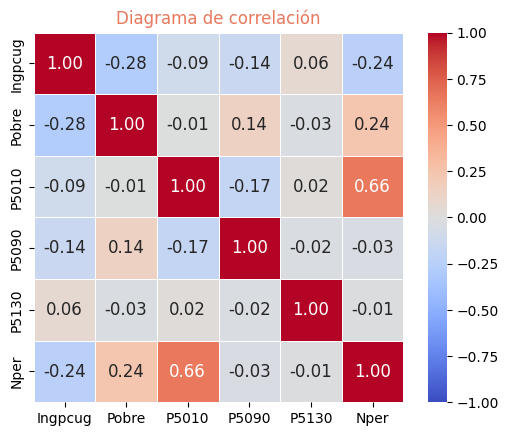

In [99]:
#Heatmap de la base hogares con las variables interesantes

columnas = ['Ingpcug', 'Pobre', 'P5010', 'P5090', 'P5130', 'Nper']
corr = train_hogares[columnas].corr()

# Crear el mapa de calor con escala fija de -1 a 1
sns.heatmap(
    corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='coolwarm', annot=True, fmt='.2f',
    cbar=True, square=True, annot_kws={'size': 12}, linewidth=.5,
    vmin=-1, vmax=1  # Configurar la escala fija de colores
)

# Personalizar el gráfico
plt.title('Diagrama de correlación', color='#E9785D')
plt.show()

**ACLARO: ESTO LE DA ESTRUCTURA, NO ES QUE SEA EXCLUYENTE LAS VARIABLES QUE PUSE**

A continuación, transformamos ciertas variables de la base de individuos para luego utilizarlas junto con los hogares. Estas variables se intuye que pueden ser buenas predictoras. Las mismas son:

P6020: sexo: creamos _prop_sex_ proporción de masculinos en la casa puede ser bueno para predecir. 

p6210: creamos _max_level_edu_. creamos una variable que sea el máximo nivel educativo alcanzado por los integrantes del hogar

p6430: creamos _ocup_jefe_. posición ocupacional de la 1ra actividad. nos podemos quedar con lo que hace el jefe de hogar.

p6920: creamos _cant_blanco_. Esta variable nos dice si está cotizando a un fondo de pensiones. crear una variable que nos diga la cantidad de empleados formales que tiene el hogar. La variable p6920 toma 3 valores: 1: si, 2: no, 3: ya es pensionado. Solo vamos a tomar 1 si está cotizando y 0 en cualquier otro caso.

Oc: cant_ocup. sumamos todos los ocupados que tiene la casa.


In [13]:
#Cambiamos el valor de mujer de 2 a 0 para poder hacer cálculos luego

train_personas['P6020'] = train_personas['P6020'].replace(2, 0)

In [18]:
#Calculamos la proporción de hombres en el hogar:

# Contar cuántos hombres hay en cada hogar (P6020 == 1)
hombres_por_hogar = train_personas[train_personas['P6020'] == 1].groupby('id')['P6020'].count()

# Contar el total de integrantes por hogar
total_por_hogar = train_personas.groupby('id')['P6020'].count()

# Calcular la proporción de hombres en cada hogar
train_personas['prop_sex'] = train_personas['id'].map(hombres_por_hogar) / train_personas['id'].map(total_por_hogar)


In [16]:
#Creamos una variable que nos diga el máximo nivel educativo de cada integrante del hogar

# Filtrar los valores válidos de 'P6210' (1 a 6, excluyendo 9)
train_personas_filtrado = train_personas[train_personas['P6210'] != 9]

# Agrupar por el identificador del hogar (asumí que hay una columna 'hogar_id' que identifica a cada hogar)
# Luego, calcular el máximo nivel educativo alcanzado en cada hogar
train_personas['mal_level_edu'] = train_personas_filtrado.groupby('id')['P6210'].transform('max')

# Si hay hogares con valores 'P6210' == 9 (sin datos válidos), asignamos el valor correspondiente para esos hogares
train_personas['mal_level_edu'] = train_personas.groupby('id')['mal_level_edu'].transform('max')

# Mostrar las primeras filas para verificar
print(train_personas[['id', 'P6210', 'mal_level_edu']].head())


                         id  P6210  mal_level_edu
0  8d0193e328305a042001a35f    3.0            5.0
1  8d0193e328305a042001a35f    2.0            5.0
2  8d0193e328305a042001a35f    5.0            5.0
3  8d0193e328305a042001a35f    2.0            5.0
4  8d0193e328305a042001a35f    4.0            5.0


In [20]:
#Creamos la variable "ocup_jefe" que toma el valor de la ocupación principal del jefe de hogar

# Filtrar la fila correspondiente al jefe del hogar (P6050 == 1)
jefe_hogar = train_personas[train_personas['P6050'] == 1]

# Crear un diccionario con la relación 'id' del hogar y la posición ocupacional del jefe (P6430)
jefe_ocupacion = jefe_hogar.set_index('id')['P6430'].to_dict()

# Asignar la posición ocupacional del jefe a la nueva variable 'ocup_jefe'
train_personas['ocup_jefe'] = train_personas['id'].map(jefe_ocupacion)


In [24]:
#Contamos la cantidad de personas trabajando en blanco que tiene el hogar

# Crear una variable que sea 1 si la persona está en blanco (P6870 == 1) y 0 en cualquier otro caso
train_personas['blanco'] = (train_personas['P6870'] == 1).astype(int)

# Agrupar por 'id' y sumar la cantidad de personas en blanco en cada hogar
cant_blanco_por_hogar = train_personas.groupby('id')['blanco'].sum()

# Asignar la suma de personas en blanco a la nueva variable 'cant_blanco' en el DataFrame original
train_personas['cant_blanco'] = train_personas['id'].map(cant_blanco_por_hogar)


In [28]:
# Crear una variable que sea 1 si la persona está ocupada (Oc == 1) y 0 en cualquier otro caso
train_personas['ocupada'] = (train_personas['Oc'] == 1).astype(int)

# Agrupar por 'id' y sumar la cantidad de personas ocupadas en cada hogar
cant_ocupada_por_hogar = train_personas.groupby('id')['ocupada'].sum()

# Asignar la suma de personas ocupadas a la nueva variable 'cant_ocupada' en el DataFrame original
train_personas['cant_ocup'] = train_personas['id'].map(cant_ocupada_por_hogar)


In [30]:
train_personas['cant_ocup'].value_counts()

cant_ocup
1     189092
2     188529
3      75167
0      46864
4      28720
5       9772
6       3211
7       1026
8        469
9        191
10        33
14        22
11        13
Name: count, dtype: int64

In [34]:
#Agregamos a la base de hogares las variables creadas en la base de personas

# Agrupar las variables creadas por 'id' en la base 'train_personas'
df_personas_agg = train_personas.groupby('id')[['mal_level_edu', 'prop_sex', 'ocup_jefe', 'cant_blanco', 'cant_ocup']].mean()

# Unir la base 'train_hogares' con las variables agregadas de 'train_personas'
train_hogares = train_hogares.merge(df_personas_agg, on='id', how='left')


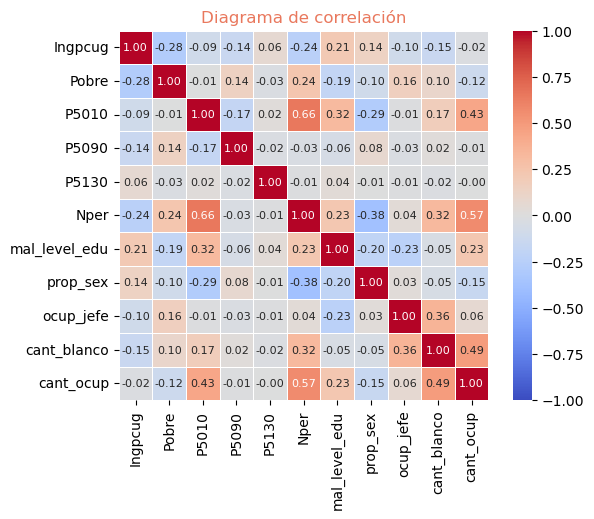

In [37]:
#Ahora exponemos la matriz de correlacion con todas las variables. 

columnas = ['Ingpcug', 'Pobre', 'P5010', 'P5090', 'P5130', 'Nper', 'mal_level_edu', 'prop_sex', 'ocup_jefe', 'cant_blanco', 'cant_ocup']
corr = train_hogares[columnas].corr()

# Crear el mapa de calor con escala fija de -1 a 1
sns.heatmap(
    corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='coolwarm', annot=True, fmt='.2f',
    cbar=True, square=True, annot_kws={'size': 8}, linewidth=.5,
    vmin=-1, vmax=1  # Configurar la escala fija de colores
)

# Personalizar el gráfico
plt.title('Diagrama de correlación', color='#E9785D')
plt.show()

# Desarrollo 

Nuestro objetivo ahora es armar un modelo que prediga si un hogar es pobre o no. Para eso vamos a utilizar los diferentes métodos:

Árboles (CARTs), Random Forest y boosting. También se pueden utilizar Linear Regression, Logit o Elastic Net

### Arboles (CARTs)

In [8]:
#importamos el algoritmo para python
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text #Para exportar arboles


In [ ]:
#Acá reemplazar por las variables que vayamos a usar
X = db[['DCBD', 'habitaciones']]
y = db['price']

# Create the decision tree model
mytree = DecisionTreeRegressor(max_leaf_nodes=3) #Hay que definir el número máximo de nodos

# Fit the model
mytree.fit(X, y)

Lo siguiente lo saqué de clase: 

Una vez entrenado el árbol, se puede representar mediante la combinación de las funciones  `export_text()` y `plot_tree()`. 
 - La función `export_text()` la estructura del árbol  y valor medio de la variable respuesta en cada nodo.  
 - La función `plot_tree()` dibuja la estructura del árbol y muestra el número de observaciones y valor medio de la variable respuesta en cada nodo.

In [ ]:
#Esto debería correr bien así, ya que todo lo definimos arriba
texto_modelo = export_text(
                    decision_tree = mytree,
                    feature_names = list(X.columns)
               )
print(texto_modelo)

In [9]:
from sklearn.tree import plot_tree

In [ ]:
# Estructura del árbol creado. Tambien deberia correr, solo le debo cambiar class_names
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(12, 5))

print(f"Profundidad del árbol: {mytree.get_depth()}")
print(f"Número de nodos terminales: {mytree.get_n_leaves()}")

plot = plot_tree(
            decision_tree = mytree,
            feature_names = X.columns,
            class_names   = 'price', #Esto habría que cambiar.  Es la variable que etiqueta. \\
            #Debieramos cambiarla por Pobre/No pobre, ya que es lo q estamos clasificando aca
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )

`DecisionTreeRegressor` del módulo `sklearn.tree` tiene  hiperparámetros, que nos permitirán "controlar" el sobreajuste:

  - `max_depth`: profundidad máxima que puede alcanzar el árbol.

  - `max_leaf_nodes`: número máximo de nodos terminales.

  - `min_samples_leaf`: número mínimo de observaciones que debe de tener cada uno de los nodos hijos para que se produzca la división. Si es un valor decimal se interpreta como fracción del total de observaciones de entrenamiento `ceil(min_samples_split * n_samples)`.

  
  - `ccp_alpha`=0.0 Cost complexity prunning
  
  - `random_state`: semilla para que los resultados sean reproducibles. Tiene que ser un valor entero.

Como en todo estudio de regresión, no solo es importante ajustar el modelo, sino también cuantificar su capacidad para predecir nuevas observaciones. Para poder hacer la posterior evaluación, se dividen los datos en dos grupos, uno de entrenamiento y otro de test.


# Random Forest

In [10]:
from sklearn.ensemble import RandomForestRegressor
import multiprocessing

In [ ]:
# Creación del modelo
# ==============================================================================
modelo_forest = RandomForestRegressor(
            n_estimators = 10,
            criterion    = 'squared_error',
            max_depth    = None,
            max_features = 1,
            oob_score    = False,
            n_jobs       = -1,
            random_state = 123
         )

# Entrenamiento del modelo
# ==============================================================================
modelo_forest.fit(X_train, y_train)

Prediccion y evaluacion del modelo

In [ ]:
# Error de test del modelo inicial
# ==============================================================================
predicciones_forest = modelo_forest.predict(X = X_test)

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones_forest,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse}")


## Optimización de Hiperparametros

El modelo inicial se ha entrenado utilizando 10 árboles (n_estimators=10) y manteniendo el resto de hiperparámetros con su valor por defecto. Al ser hiperparámetros, no se puede saber de antemano cuál es el valor más adecuado, la forma de identificarlos es mediante el uso de estrategias de validación, por ejemplo validación cruzada.

Los modelos Random Forest tienen la ventaja de disponer del Out-of-Bag error, lo que permite obtener una estimación del error de test sin recurrir a la validación cruzada, que es computacionalmente costosa. En la implementación de RandomForestRegressor, la métrica devuelta como oob_score es el 𝑅2, si se desea otra, se tiene que recurrir al método oob_decision_function_() para obtener las predicciones y con ellas calcular la métrica de interés. Para una explicación más detallada consultar: Grid search de modelos Random Forest con out-of-bag error y early stopping.

Cabe tener en cuenta que, cuando se busca el valor óptimo de un hiperparámetro con dos métricas distintas, el resultado obtenido raramente es el mismo. Lo importante es que ambas métricas identifiquen las mismas regiones de interés.



   La clase RandomForestRegressor del módulo sklearn.ensemble contiene varios hiperparámetros. De entre todos ellos, destacan aquellos que detienen el crecimiento de los árboles, los que controlan el número de árboles y predictores incluidos, y los que gestionan la paralelización:

   - `n_estimators`; número de árboles incluidos en el modelo.

   - `max_depth`: profundidad máxima que pueden alcanzar los árboles.

   - `min_samples_split`: número mínimo de observaciones que debe de tener un nodo para que pueda dividirse. Si es un valor decimal se interpreta como fracción del total de observaciones de entrenamiento ceil(min_samples_split * n_samples).

   - `min_samples_leaf`: número mínimo de observaciones que debe de tener cada uno de los nodos hijos para que se produzca la división. Si es un valor decimal se interpreta como fracción del total de observaciones de entrenamiento ceil(min_samples_split * n_samples).

   - `max_leaf_nodes`: número máximo de nodos terminales que pueden tener los árboles.

   - `max_features`: número de predictores considerados a en cada división. Puede ser:
        Un valor entero
        Una fracción del total de predictores..
        “sqrt”, raiz cuadrada del número total de predictores.
        “log2”, log2 del número total de predictores.
        None, utiliza todos los predictores.

   - `oob_score`: Si se calcula o no el out-of-bag R^2. Por defecto es False ya que aumenta el tiempo de entrenamiento.

   - `n_jobs`: número de cores empleados para el entrenamiento. En random forest los árboles se ajustan de forma independiente, por lo la paralelización reduce notablemente el tiempo de entrenamiento. Con -1 se utilizan todos los cores disponibles.

   - `random_state`: semilla para que los resultados sean reproducibles. Tiene que ser un valor entero.

#### Número de árboles

En Random Forest, el número de árboles no es un hiperparámetro crítico en cuanto que, añadir árboles, solo puede hacer que mejorar el resultado. En Random Forest no se produce overfitting por exceso de árboles. Sin embargo, añadir árboles una vez que la mejora se estabiliza es una perdida te recursos computacionales.

In [ ]:
# Validación empleando el Out-of-Bag error
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')
train_scores = []
oob_scores   = []

# Valores evaluados
estimator_range = range(10, 150, 5)

# Bucle para entrenar un modelo con cada valor de n_estimators y extraer su error
# de entrenamiento y de Out-of-Bag.
for n_estimators in estimator_range:
    modelo = RandomForestRegressor(
                n_estimators = n_estimators,
                criterion    = 'squared_error',
                max_depth    = None,
                max_features = 1,
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123
             )
    modelo.fit(X_train, y_train)
    train_scores.append(modelo.score(X_train, y_train))
    oob_scores.append(modelo.oob_score_)

In [ ]:
# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(5, 3))
ax.plot(estimator_range, train_scores, label="train scores")
ax.plot(estimator_range, oob_scores, label="out-of-bag scores")
ax.plot(estimator_range[np.argmax(oob_scores)], max(oob_scores),
        marker='o', color = "red", label="max score")
ax.set_ylabel("R^2")
ax.set_xlabel("n_estimators")
ax.set_title("Evolución del out-of-bag-error vs número árboles")
plt.legend();
print(f"Valor óptimo de n_estimators: {estimator_range[np.argmax(oob_scores)]}")
warnings.filterwarnings('default')

#### Max features

El valor de `max_features` es uno de los hiperparámetros más importantes de random forest, ya que es el que permite controlar cuánto se decorrelacionan los árboles entre sí.

In [ ]:
# housing dataset correlation in heat map
housing_dataset_correlation = california_housing.corr()
plt.figure(figsize=(24,14))
sns.heatmap(housing_dataset_correlation, annot = True)

In [ ]:
# Validación empleando el Out-of-Bag error
# ==============================================================================
train_scores = []
oob_scores   = []

# Valores evaluados
max_features_range = range(1, X_train.shape[1] + 1, 1)

# Bucle para entrenar un modelo con cada valor de max_features y extraer su error
# de entrenamiento y de Out-of-Bag.
for max_features in max_features_range:
    modelo = RandomForestRegressor(
                n_estimators = 100,
                criterion    = 'squared_error',
                max_depth    = None,
                max_features = max_features,
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123
             )
    modelo.fit(X_train, y_train)
    train_scores.append(modelo.score(X_train, y_train))
    oob_scores.append(modelo.oob_score_)
    
# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(5, 3))
ax.plot(max_features_range, train_scores, label="train scores")
ax.plot(max_features_range, oob_scores, label="out-of-bag scores")
ax.plot(max_features_range[np.argmax(oob_scores)], max(oob_scores),
        marker='o', color = "red")
ax.set_ylabel("R^2")
ax.set_xlabel("max_features")
ax.set_title("Evolución del out-of-bag-error vs número de predictores")
plt.legend();
print(f"Valor óptimo de max_features: {max_features_range[np.argmax(oob_scores)]}")

##### Grid search

Aunque el análisis individual de los hiperparámetros es útil para entender su impacto en el modelo e identificar rangos de interés, la búsqueda final no debe hacerse de forma secuencial, ya que cada hiperparámetro interacciona con los demás. Es preferible recurrir a grid search o random search para analizar varias combinaciones de hiperparámetros.

In [ ]:
from sklearn.model_selection import ParameterGrid
# Grid Search Aleatorio basado en validación cruzada
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedKFold

In [ ]:

# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = {'n_estimators': [100,150,200],
              'max_features': [5, 7, 9],
              'max_depth'   : [None, 3, 10, 20]
             }

# Búsqueda por grid search con validación cruzada
# ==============================================================================
grid_forest_cv = RandomizedSearchCV(
            estimator  = RandomForestRegressor(random_state = 123),
            param_distributions = param_grid,
            scoring    = 'neg_root_mean_squared_error',
            n_jobs     = multiprocessing.cpu_count() - 1,
            n_iter=2, 
            cv=5, 
            random_state=42,
            refit=True
       )

grid_forest_cv.fit(X = X_train, y = y_train)

# Resultados
# ==============================================================================
resultados = pd.DataFrame(grid_forest_cv.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)


# Mejores hiperparámetros por validación cruzada
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid_forest_cv.best_params_, ":", grid_forest_cv.best_score_, grid_forest_cv.scoring)


Una vez identificados los mejores hiperparámetros, se reentrena el modelo indicando los valores óptimos en sus argumentos. Si en el GridSearchCV() se indica refit=True, este reentrenamiento se hace automáticamente y el modelo resultante se encuentra almacenado en .best_estimator_.

In [ ]:
# Error de test del modelo final
# ==============================================================================
modelo_grid_forest_cv_final = grid_forest_cv.best_estimator_
predicciones_grid_forest_cv_final = modelo_grid_forest_cv_final.predict(X = X_test)
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones_grid_forest_cv_final,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse}")

## Boosting trees

### Hiperparámetros

- $\lambda$ la tasa a la que aprende, los valores típicos son 0.1, 0.01 o 0.001

In [ ]:
#################################333

## Estimación Logit

\begin{align}
p_i &=\frac{e^{X_i\beta}}{1+e^{X_i\beta}}
\end{align}

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split



# Convert 'history' and 'purpose' into dummy variables
db_dummies = pd.get_dummies(db, columns=['history', 'purpose','foreign'], drop_first=True)

# Separate the independent and dependent variables
X = db_dummies.drop('Default', axis=1)
y = db_dummies['Default']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [ ]:
# Fit the logistic regression model
logit_model = LogisticRegression(max_iter=200 )
logit_model.fit(X_train,y_train)



## Prediction


\begin{align}
\hat{p}_i &=\frac{e^{X_i\hat{\beta}}}{1+e^{X_i\hat{\beta}}}
\end{align}

In [ ]:
y_test=pd.DataFrame(y_test)
y_test.head()

In [ ]:
# Predict the probabilities
y_test['prob_hat'] = logit_model.predict_proba(X_test)[:, 1]

# Display the first few rows of the specified columns
y_test.head(30)